# Import Overlay
导入Overlay

In [1]:
import pynq.lib.dma
import numpy as np
dftol = pynq.Overlay("./fft/fft.bit")

dma0 = dftol.axi_dma_0
dma1 = dftol.axi_dma_1

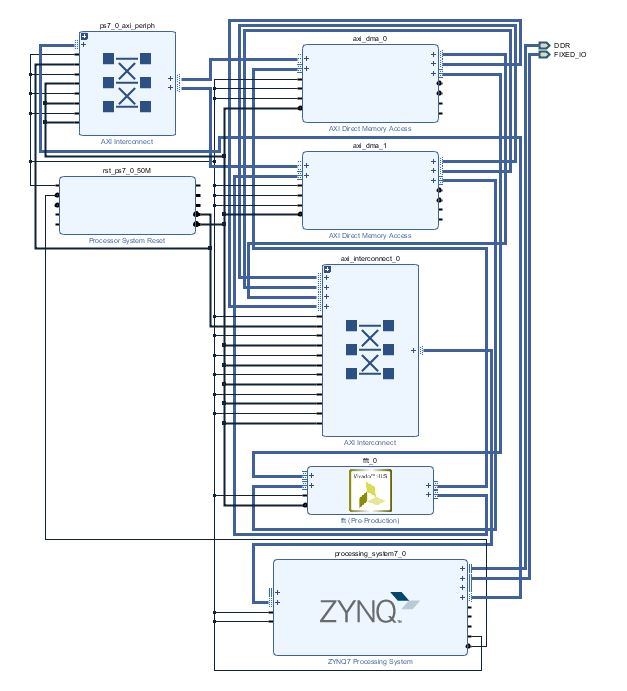

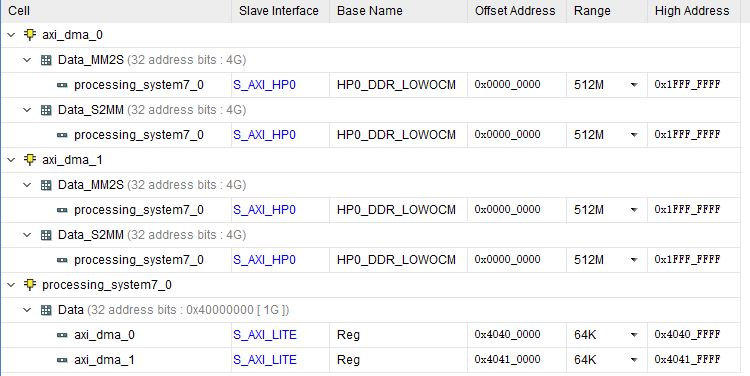

In [2]:
#生成输入数据并输出
from pynq import Xlnk
xlnk = Xlnk()
samplereal = xlnk.cma_array(shape=(1024,), dtype=np.float32)
sampleimag = xlnk.cma_array(shape=(1024,), dtype=np.float32)
outreal = xlnk.cma_array(shape=(1024,), dtype=np.float32)
outimag = xlnk.cma_array(shape=(1024,), dtype=np.float32)

for i in range(1024):
    samplereal[i] = i

for j in range(1024):
    sampleimag[j] = 0
   
dma0.sendchannel.transfer(samplereal)
dma1.sendchannel.transfer(sampleimag)
dma0.recvchannel.transfer(outreal)
dma1.recvchannel.transfer(outimag)
print(outreal)
print(outimag)

[  5.23776000e+05  -2.62032922e+05  -1.30894375e+05 ...,   2.12414865e-03
   2.92085903e-03  -1.20488164e-06]
[  0.00000000e+00   7.23699658e+03   6.43042285e+03 ...,   1.76354559e-04
   1.79434821e-04   3.56945311e-05]


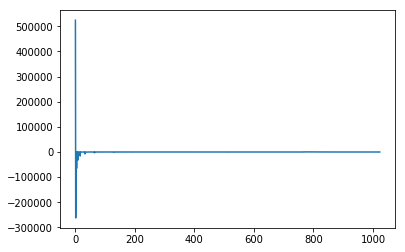

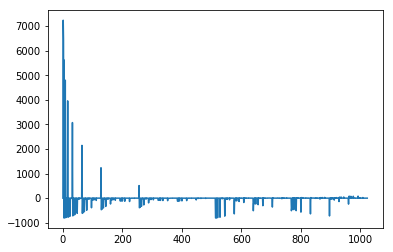

In [4]:
#画图
from pynq import Overlay
import pynq.lib.dma

import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import scipy.fftpack
import numpy.fft

actualreal = samplereal[0:128]
fig1 = plt.figure()
ax1 = fig1.gca()
plt.plot(outreal)

fig2 = plt.figure()
ax2 = fig2.gca()

plt.plot(outimag)